**Simple Transfer Learning Example** (Movie review into +ve/-ve)

In [1]:
# # Uncomment following and run once if dependencies not installed

# !pip install tensorflow
# !pip install tensorflow_hub
# !pip install tensorflow_datasets
# !pip install matplotlib


In [2]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

Load [the Internet Movie DataBase (IMDB) reviews data set.](https://colab.research.google.com/github/tensorflow/hub/blob/master/examples/colab/tf2_text_classification.ipynb#scrollTo=2ew7HTbPpCJH).

In [3]:
train_data, test_data = tfds.load(name="imdb_reviews", 
                                  split=["train", "test"], 
                                  batch_size=-1, as_supervised=True)

train_examples, train_labels = tfds.as_numpy(train_data)
test_examples, test_labels = tfds.as_numpy(test_data)

Load a pretrained embedding mode: [gnews-swivel-20dim](https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1).

In [4]:
model = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(model, output_shape=[20], input_shape=[], 
                           dtype=tf.string, trainable=True)

Sanity Check

In [5]:
train_examples[:10]

array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
       b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot 

The embedding layer can convert each to 20-number vectors.

In [6]:
hub_layer(train_examples[:10])

<tf.Tensor: shape=(10, 20), dtype=float32, numpy=
array([[ 1.765786  , -3.882232  ,  3.9134233 , -1.5557289 , -3.3362343 ,
        -1.7357955 , -1.9954445 ,  1.2989551 ,  5.081598  , -1.1041286 ,
        -2.0503852 , -0.72675157, -0.65675956,  0.24436149, -3.7208383 ,
         2.0954835 ,  2.2969332 , -2.0689783 , -2.9489717 , -1.1315987 ],
       [ 1.8804485 , -2.5852382 ,  3.4066997 ,  1.0982676 , -4.056685  ,
        -4.891284  , -2.785554  ,  1.3874227 ,  3.8476458 , -0.9256538 ,
        -1.896706  ,  1.2113281 ,  0.11474707,  0.76209456, -4.8791065 ,
         2.906149  ,  4.7087674 , -2.3652055 , -3.5015898 , -1.6390051 ],
       [ 0.71152234, -0.6353217 ,  1.7385626 , -1.1168286 , -0.5451594 ,
        -1.1808156 ,  0.09504455,  1.4653089 ,  0.66059524,  0.79308075,
        -2.2268345 ,  0.07446612, -1.4075904 , -0.70645386, -1.907037  ,
         1.4419787 ,  1.9551861 , -0.42660055, -2.8022065 ,  0.43727064],
       [ 1.5165    , -0.71034056,  1.8556767 , -1.2033532 , -1.3105817 

Add additional layers(if needed) and an output Neuron to classify the movie reviews as either positive or negative.

In [7]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 20)                400020    
_________________________________________________________________
dense (Dense)                (None, 16)                336       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


Compile the neural network. (Specify optimizer, loss function and metrics)

In [8]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

train the neural network.

In [9]:
x_val = train_examples[:10000]
partial_x_train = train_examples[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [10]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/30
30/30 [==============================] - 2s 42ms/step - loss: 1.0181 - accuracy: 0.5156 - val_loss: 0.7185 - val_accuracy: 0.5487
Epoch 2/30
30/30 [==============================] - 1s 33ms/step - loss: 0.6978 - accuracy: 0.5649 - val_loss: 0.6445 - val_accuracy: 0.6382
Epoch 3/30
30/30 [==============================] - 1s 34ms/step - loss: 0.6262 - accuracy: 0.6599 - val_loss: 0.6084 - val_accuracy: 0.6756
Epoch 4/30
30/30 [==============================] - 1s 32ms/step - loss: 0.5916 - accuracy: 0.6846 - val_loss: 0.5767 - val_accuracy: 0.7027
Epoch 5/30
30/30 [==============================] - 1s 33ms/step - loss: 0.5481 - accuracy: 0.7252 - val_loss: 0.5450 - val_accuracy: 0.7293
Epoch 6/30
30/30 [==============================] - 1s 31ms/step - loss: 0.5143 - accuracy: 0.7566 - val_loss: 0.5135 - val_accuracy: 0.7543
Epoch 7/30
30/30 [==============================] - 1s 34ms/step - loss: 0.4796 - accuracy: 0.7780 - val_loss: 0.4850 - val_accuracy: 0.7759
Epoch 8/30
30

Evaluate the neural network.

In [15]:
results = model.evaluate(test_data, test_labels)

print(results)

782/782 [==============================] - 2s 2ms/step - loss: 0.3502 - accuracy: 0.8622
[0.3501783609390259, 0.8622000217437744]


In [16]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

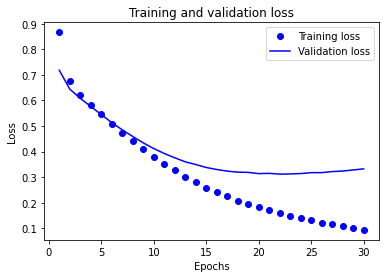

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

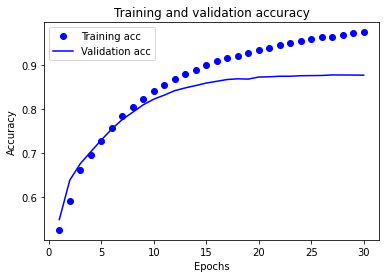

In [19]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Should probably train the model using 10 - 15 epochs